In [1]:
 #imports
import warnings

warnings.filterwarnings("ignore")
%autosave 0

Autosave disabled


In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#custom imports
from env import get_connection

# Exercises
> The end result of this exercise should be a file named prepare.py.

* **Using your store items data:**

In [3]:
url = get_connection('tsa_item_demand')

query = '''
        SELECT sale_date, sale_amount, 
        item_brand, item_name, item_price, 
        store_address, store_zipcode, 
        store_city, store_state
        FROM sales
        LEFT JOIN items USING(item_id)
        LEFT JOIN stores USING(store_id)
        '''

def get_tsa():
    '''
    a function that searches for and retieves data. 
    if it does not find it it will retirve the data 
    from os it will query database and pull from
    url
    '''

    filename = 'tsa_item_data.csv'

    if os.path.isfile(filename):

        return pd.read_csv(filename)
        
    else:
        
        df = pd.read_sql(query, url)
        df.to_csv(filename, index=0)

        return df

In [4]:
df = get_tsa()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


## 1. Convert date column to datetime format.

In [5]:
df.sale_date = pd.to_datetime(df.sale_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  int64         
 7   store_city     913000 non-null  object        
 8   store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 62.7+ MB


## 2. Plot the distribution of sale_amount and item_price.

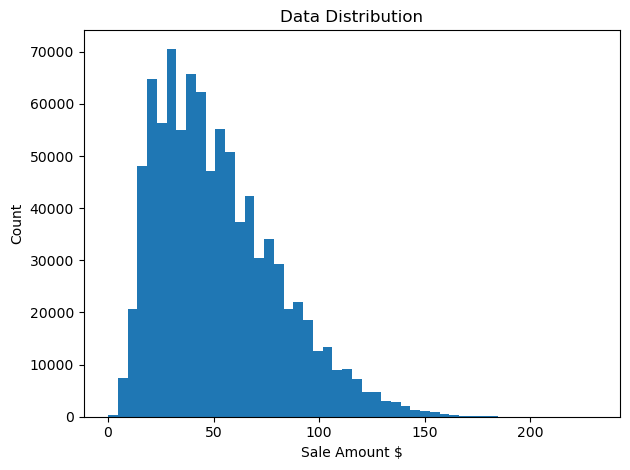

In [6]:
plt.hist(df.sale_amount, bins=50)
plt.title('Data Distribution')
plt.xlabel('Sale Amount $')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

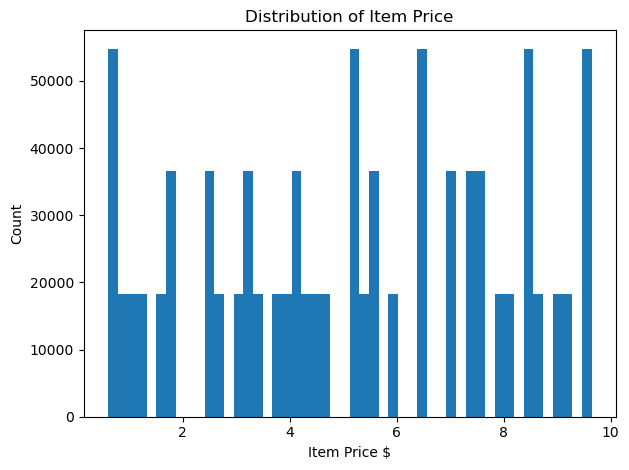

In [7]:
plt.hist(df.item_price, bins=50)
plt.title('Distribution of Item Price')
plt.xlabel('Item Price $')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 3. Set the index to be the datetime variable.

In [8]:
df = df.set_index('sale_date')
df = df.sort_values('sale_date')
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


## 4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.month_name()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [10]:
df['day_of_week'] = df.index.day_name()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday


In [11]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [12]:
def prep_tsa():
    df = get_tsa()
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date')
    df = df.sort_values('sale_date')
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price

    return df

In [13]:
df1 = prep_tsa()
df1.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


In [14]:
import acquire as a
import prepare as p

In [15]:
df1 = a.get_tsa()
df1.head(1)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [16]:
df1 = p.prep_tsa()
df1.head(1)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92


> **acquire.py and prepare.py completed**

In [17]:
import urllib.request
import requests

url: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [18]:
# Tried to use not, an API url

# url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
# response = requests.get(url)
# print(response.text)

> Resource: https://docs.python.org/3/library/urllib.request.html  
>  
> **Note: The urllib.request module defines functions and classes which help in opening URLs (mostly HTTP) in a complex world — basic and digest authentication, redirections, cookies and more.**

In [19]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
urllib.request.urlretrieve(url, 'opsd_germany_daily.csv')

('opsd_germany_daily.csv', <http.client.HTTPMessage at 0x29263a860>)

In [20]:
df = pd.read_csv('opsd_germany_daily.csv')

In [21]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [22]:
def opsd_data():
    url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
    urllib.request.urlretrieve(url, 'opsd_germany_daily.csv')
    df = pd.read_csv('opsd_germany_daily.csv')

    return df

In [23]:
df = opsd_data()

In [24]:
# noticed date is listed as object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


* **Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**

## 1. Convert date column to datetime format.

In [25]:
# cleaned up columns names prior to conversion
df.columns = [col.lower().replace('+', '_') for col in df.columns]
df.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [26]:
# convert datetime
df.date = pd.to_datetime(df.date)
df.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [27]:
# confirmed change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4383 non-null   datetime64[ns]
 1   consumption  4383 non-null   float64       
 2   wind         2920 non-null   float64       
 3   solar        2188 non-null   float64       
 4   wind_solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


## 2. Plot the distribution of each of your variables.

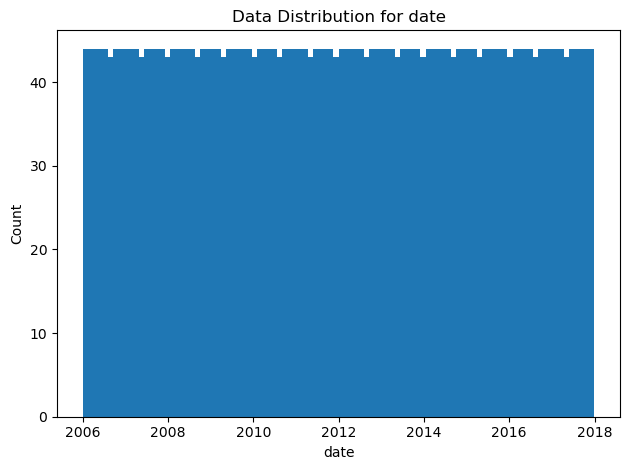

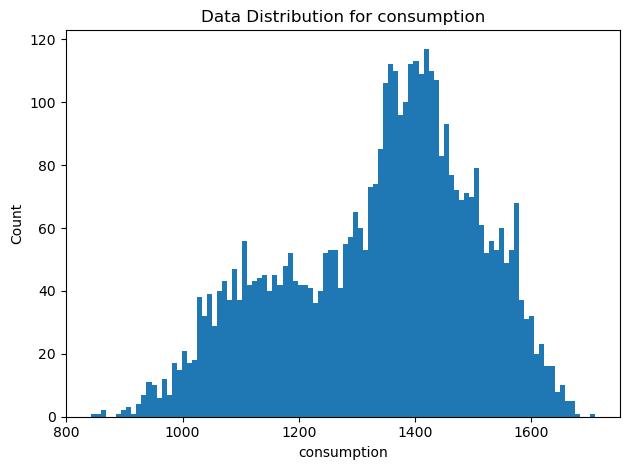

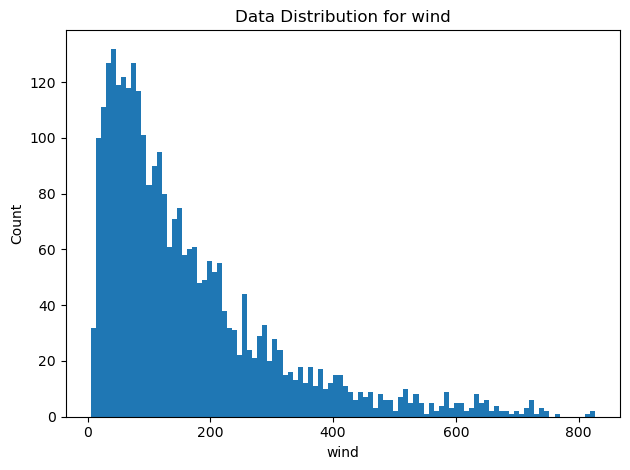

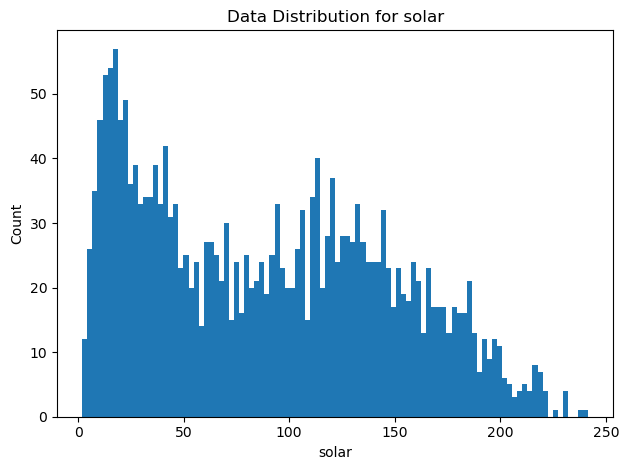

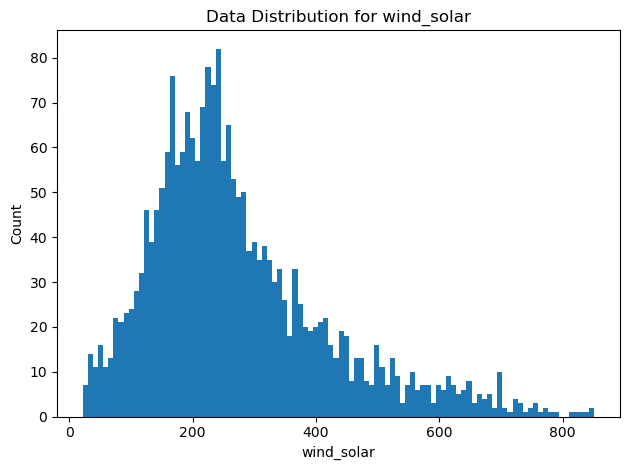

In [28]:
for column in df.columns:
    plt.hist(df[column], bins=100)
    plt.title(f'Data Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## 3. Set the index to be the datetime variable.

In [29]:
df = df.set_index('date')
df = df.sort_values('date')
df.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


## 4. Add a month and a year column to your dataframe.

In [30]:
df['month'] = df.index.strftime('%B')
df.head()

,consumption,wind,solar,wind_solar,month
date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


In [31]:
df.index.year.value_counts()

2008    366
2012    366
2016    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
Name: date, dtype: int64

> Resource: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html  
>  
> **Note: Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.**

In [32]:
# df['year'] = pd.DatetimeIndex(df.index).year
# df.head()

In [33]:
df['year'] = df.index.year
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [35]:
#confirmed the column had all values; previously was only returning 2007
df.year.value_counts()

2008    366
2012    366
2016    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
Name: year, dtype: int64

## 5. Fill any missing values.

In [36]:
# three columns have missing values
df.isna().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [37]:
df.wind.isna().value_counts(),

(False    2920
 True     1463
 Name: wind, dtype: int64,)

In [38]:
df.solar.isna().value_counts(),

(True     2195
 False    2188
 Name: solar, dtype: int64,)

In [39]:
df.wind_solar.isna().value_counts()

True     2196
False    2187
Name: wind_solar, dtype: int64

In [40]:
# filled respective column with nan values with mean
df = df.fillna(0)

In [41]:
df.head(1)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006


In [42]:
# checked to see if all nan values were filled
df.isna().sum()

consumption    0
wind           0
solar          0
wind_solar     0
month          0
year           0
dtype: int64

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [43]:
def prep_opsd():
    df = opsd_data()
    df.columns = [col.lower().replace('+', '_') for col in df.columns]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.sort_values('date')
    df['month'] = df.index.strftime('%B')
    df['year'] = df.index.year
    df = df.fillna(0)

    return df

df = prep_opsd()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [45]:
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [46]:
df = a.opsd_data()
df.head(1)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN


In [47]:
df = p.prep_opsd()
df.head(1)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006


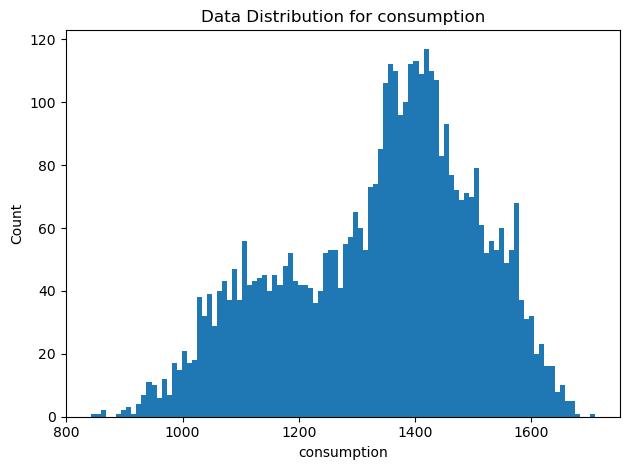

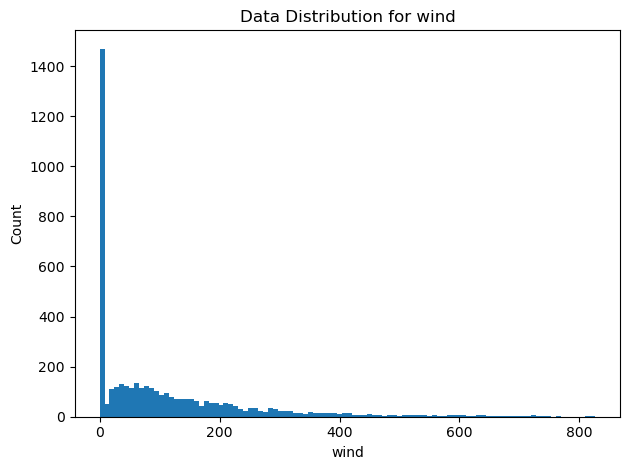

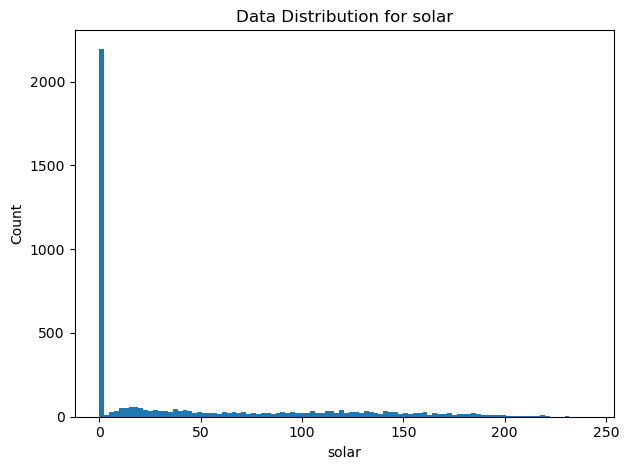

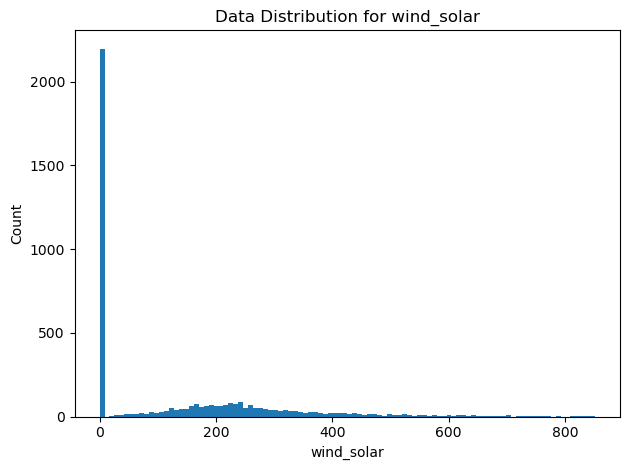

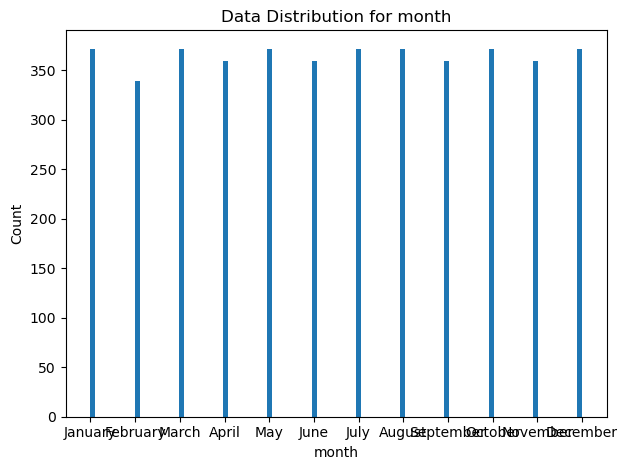

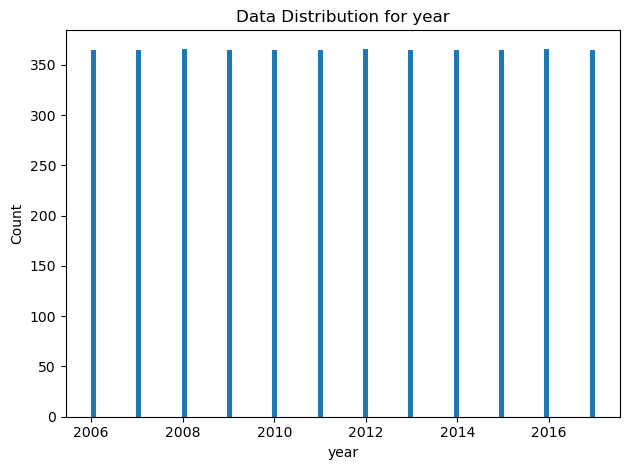

In [48]:
for column in df.columns:
    plt.hist(df[column], bins=100)
    plt.title(f'Data Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [49]:
df1.to_csv('stores.csv')